In [2]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline


['solidWhiteCurve.jpg', 'solidWhiteRight.jpg', 'solidYellowCurve.jpg', 'solidYellowCurve2.jpg', 'solidYellowLeft.jpg', 'whiteCarLaneSwitch.jpg']
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


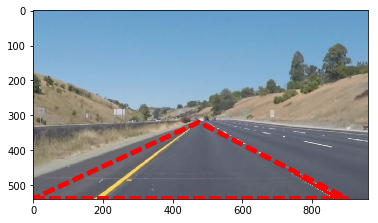

In [12]:
import os
dirs=os.listdir("test_images/")
print(dirs)
for file in dirs:
    image = mpimg.imread("test_images/"+file)

    #printing out some stats and plotting
    print('This image is:', type(image), 'with dimensions:', image.shape)
    plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
    ysize = image.shape[0]
    xsize = image.shape[1]
    color_select = np.copy(image)
    line_image = np.copy(image)
    red_threshold = 200
    green_threshold = 200
    blue_threshold = 200
    rgb_threshold = [red_threshold, green_threshold, blue_threshold]
    left_bottom = [0, 539]
    right_bottom = [900, 539]
    apex = [475, 320]
    fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
    fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
    fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
    
    color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                        (image[:,:,1] < rgb_threshold[1]) | \
                        (image[:,:,2] < rgb_threshold[2])
            
    XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
    region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
    color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]
    # Color pixels red where both color and region selections met
    line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

    # Display the image and show region and color selections
    plt.imshow(image)
    x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
    y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
    plt.plot(x, y, 'r--', lw=4)
    plt.imshow(color_select)
    plt.imshow(line_image)
            
    



This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
540
960
[[[  0 540]
  [450 290]
  [490 290]
  [960 540]]]
480.0
left
left
left
left
left
left
right
left
right
right
1.0
ab 540 270
0.629639195319


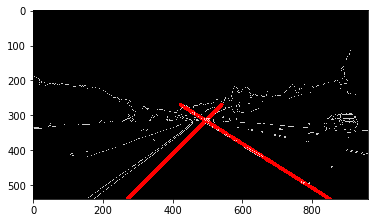

In [95]:
image = mpimg.imread('test_images/solidYellowCurve.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
low_threshold = 100
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')
mask = np.zeros_like(edges)   
ignore_mask_color = 255 
imshape = image.shape
print (imshape[0])
print (imshape[1])
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
print(vertices)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100 #minimum number of pixels making up a line
max_line_gap = 180    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
left_x=[]
left_y=[]
right_y=[]
right_x=[]
mid_x=imshape[1]/2
print (mid_x)
for line in lines:
    for x1,y1,x2,y2 in line:
        if x1 > mid_x and x2>mid_x:
            print("right")
            right_x=right_x+[x1,x2]
            right_y=right_y+[y1,y2]
        elif x1 < mid_x and x2<mid_x:
            print("left")
            left_x=left_x+[x1,x2]
            left_y=left_y+[x1,x2]

ymax=imshape[0]
ymin=imshape[0]/2

if len(left_y)>0 and len(left_x) >0:
    left_m,left_b=np.polyfit(left_x,left_y,1)
    print (left_m)
    xmax_left=(ymax-left_b)/left_m
    xmin_left=(ymin-left_b)/left_m
    xmax_left=int(xmax_left)
    xmin_left=int(xmin_left)
    ymaxi=int(ymax)
    ymini=int(ymin)
    print("ab",xmax_left,xmin_left)
    cv2.line(line_image,(xmax_left,ymini),(xmin_left,ymaxi),(255,0,0),10)

    
if len(right_x)>0 and len(right_y) >0:
    right_m, right_b=np.polyfit(right_x,right_y,1)
    print (right_m)
    xmax_right=(ymax-right_b)/right_m
    xmin_right=(ymin-right_b)/right_m
    xmax_right=int(xmax_right)
    xmin_right=int(xmin_right)
    ymaxi=int(ymax)
    ymini=int(ymin)
    #cv2.line(line_image,(xmax_left,ymaxi),(xmin_left,ymini),(255,0,0),10)

    cv2.line(line_image,(xmax_right,ymaxi),(xmin_right,ymini),(255,0,0),10)


    

    
# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)
540
960
[[[  0 540]
  [450 290]
  [490 290]
  [960 540]]]
left
right


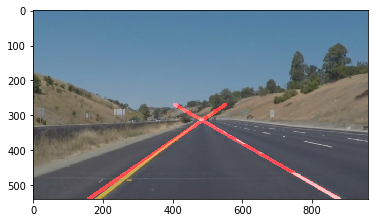

In [104]:
image = mpimg.imread('test_images/whiteCarLaneSwitch.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size for Gaussian smoothing / blurring
kernel_size = 5 # Must be an odd number (3, 5, 7...)
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and run it
low_threshold = 100
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Display the image
plt.imshow(edges, cmap='Greys_r')
mask = np.zeros_like(edges)   
ignore_mask_color = 255 
imshape = image.shape
print (imshape[0])
print (imshape[1])
vertices = np.array([[(0,imshape[0]),(450, 290), (490, 290), (imshape[1],imshape[0])]], dtype=np.int32)
print(vertices)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100 #minimum number of pixels making up a line
max_line_gap = 180    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)


# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges,edges))
# Iterate over the output "lines" and draw lines on a blank image
leftPoints = []
rightPoints = []
for line in lines:
    for x1,y1,x2,y2 in line:
        m = (y2-y1) / (x2-x1)
        if np.isnan(float(m)):
            continue
        if abs(m) < 0.3:
            continue
                
        if m > 0:
            rightPoints.append((x1,y1))
            rightPoints.append((x2,y2))
        elif m < 0:
            leftPoints.append((x1,y1))
            leftPoints.append((x2,y2))
ymax=imshape[0]
ymin=imshape[0]/2    
fitted_points = []
#we need at least two points to form a line
if len(leftPoints) > 2:
    print("left")
    leftPoints = np.array(leftPoints)
    X = leftPoints[:,0]
    y = leftPoints[:,1]
        
    left_m, left_b = np.polyfit(X,y,1)
    xmax_left=(ymax-left_b)/left_m
    xmin_left=(ymin-left_b)/left_m
    xmax_left=int(xmax_left)
    xmin_left=int(xmin_left)
    ymaxi=int(ymax)
    ymini=int(ymin)
    cv2.line(line_image,(xmax_left,ymaxi),(xmin_left,ymini),(255,0,0),10)
    
if len(rightPoints) > 2:
    print("right")
    rightPoints = np.array(rightPoints)
    X = rightPoints[:,0]
    y = rightPoints[:,1]
    right_m, right_b = np.polyfit(X,y,1)
        
        
    xmax_right=(ymax-right_b)/right_m
    xmin_right=(ymin-right_b)/right_m
    xmax_right=int(xmax_right)
    xmin_right=int(xmin_right)
    ymaxi=int(ymax)
    ymini=int(ymin)
    #cv2.line(line_image,(xmax_left,ymaxi),(xmin_left,ymini),(255,0,0),10)

    cv2.line(line_image,(xmax_right,ymaxi),(xmin_right,ymini),(255,0,0),10)


# Draw the lines on the edge image
#lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0)
plt.imshow(lines_edges)


This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


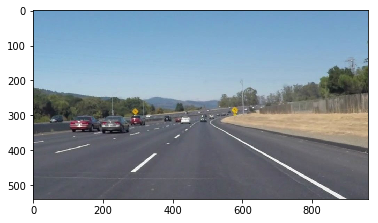

In [71]:
#reading in an image solidWhiteRight solidWhiteCurve.jpg solidYellowCurve.jpg solidYellowCurve2.jpg solidYellowLeft.jpg whiteCarLaneSwitch.jpg
image = mpimg.imread('test_images/solidWhiteCurve.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')